# Uso básico de R  

R es un lenguaje interpretado con orientación al computo estadistico y la realización de gráficos.  

## Instalación  

Para la instalación del interprete de R en ubuntu, usaremos el gestor de paquetes como administrador

    apt install -y r-base

Ahora debemos realizar la instalación de los complementos necesarios para su uso en los notebooks.  

Para la instalación de paquetes desde R es necesario tener los siguientes paquetes:

    apt install -y curl libssl-dev libcurl4-openssl-dev libxml2-dev

En este paso requerimos iniciar R en la terminal (aun como administrador), lo cual hacemos con `R`. Una vez estamos en la consola de R realizamos lo siguiente:  

    install.packages(c('repr', 'IRdisplay', 'crayon', 'pbdZMQ', 'devtools'))
    devtools::install_github('IRkernel/IRkernel')

Tras la primera linea es necesario (si es la primera vez que realizamos una instalación) configurar el servidor CRAN, de preferencia al lugar geografico más cercano. En este punto ya esta instalado el kernel, pero ahora debe registrarse para que sea reconocido por jupyter, proceso que se realiza en cada sesión de usuario que lo requiera.  

    IRkernel::installspec()

Ahora ya podemos salir del administrador, y ejecutar como usuario normal a `jupyter` seguido del comando de interes (`notebook`, `console`, `lab`) y finalmente `--kernel=ir`. La última parte indica el kernel asociado a R. Igualmente se puede hacer la selección del kernel de forma grafica con el gui de la interface que deseamos usar.  

Si usamos Anaconda para la instalación de python, una forma simple de hacer este mismo proceso será:  

    conda install -c r r-essentials

Esto nos ofrece una gran ventaja si nuestra distribución de linux no contiene las dependecias en la versión requerida (incluyendo `R >= 3.2`) para que los paquetes que requerimos instalar con el gestor de R sean reconocidos en el repositorio o si estamos en windows. Otra opción si no queremos usar Anaconda en linux y tenemos una versión de R anterior, es especificar el repositorio de instalación:  

    install.packages(c('rzmq','repr','IRkernel','IRdisplay'), repos = 'http://irkernel.github.io/', type = 'source')

## Datos y funciones  

Mediante ejemplificación se trabajarán algunos tipos de datos, sintaxis y funciones estadisticas básicas del lenaguaje `R`.  

### Paquetes

Para la instalación de paquetes adicionales, se usa tal como se indico al inicio, la instrucción `install.packages(PKGNAME)` donde `PKGNAME` se reemplaza por el nombre del paquete. Para cargar el paquete usamos `library(PKGNAME)`. Tambien es posible desasociar la carga de un paquete con el fin de reducir la memoria. Pruebe el siguiente código, usando la primera linea como administrador dentro de R.  

    install.packages('fortunes')
    library(fortunes)
    fortunes()
    detach(package:fortunes)
    fortunes()

Podemos consultar la ayuda sobre una función dada con `help` y hacer una busqueda de posibles funciones con base a una parte del nombre con `apropos`.

In [1]:
help("library")

library {base},R Documentation
"package, help","the name of a package, given as a name or literal character string, or a character string, depending on whether character.only is FALSE (default) or TRUE)."
pos,the position on the search list at which to attach the loaded namespace. Can also be the name of a position on the current search list as given by search().
lib.loc,"a character vector describing the location of R library trees to search through, or NULL. The default value of NULL corresponds to all libraries currently known to .libPaths(). Non-existent library trees are silently ignored."
character.only,a logical indicating whether package or help can be assumed to be character strings.
logical.return,"logical. If it is TRUE, FALSE or TRUE is returned to indicate success."
warn.conflicts,"logical. If TRUE, warnings are printed about conflicts from attaching the new package. A conflict is a function masking a function, or a non-function masking a non-function."
verbose,"a logical. If TRUE, additional diagnostics are printed."
quietly,"a logical. If TRUE, no message confirming package attaching is printed, and most often, no errors/warnings are printed if package attaching fails."


In [2]:
apropos("install")

[1] "installed.packages" "install.packages"

### Tipos de datos y aritmetica

El lenguaje R soporte dos mecanismos equivalentes de asignación, uno mediante `=` y otro mediante `<-` o `->` donde la dirección de la flecha indica donde esta la variable en la cual se hará la asignación.  
La asignación es de tipo dinamico, es decir, no se requiere indicar el tipo de dato para su asignación, sino que es inferido por el lenguaje.  
La sintaxis aritmetica es de forma tradicional a la usada en python 3 (resaltando el uso de la división flotante) pero diferenciando en el operador modulo el cual requiere `%%` y no `%`. Al igual que octave, tiene soporte para el operador de potencia tradicional `^` y para el equivalente en python `**`. R viene con funciones matematicas accesibles de forma inmediata sin realizar la carga de paquetes.

In [3]:
# Al igual que la mayor parte de lenguajes compatibles con los interpretes linux, los comentarios son con signo numero
x = 1/2; x
y <- 2; y
3 -> z; z
x + y
x / y
x %% y
x ** y
x ^ y
sqrt(x - y + 0i)
sin(x) + exp(x) - log(x)
!((1 > 2) & FALSE)
palabra = "hola mundo"; palabra

[1] 0.5

[1] 2

[1] 3

[1] 2.5

[1] 0.25

[1] 0.5

[1] 0.25

[1] 0.25

[1] 0+1.224745i

[1] 2.821294

[1] TRUE

[1] "hola mundo"

### Funciones

Al igual que otros lenguajes, la indicación de una función se realiza mediante su nombre clave seguido de parentesis y los argumentos en su interior. Un ejemplo de función es la construcción de vectores mediante la función `c`.  

In [4]:
vector_a = c(0, 1, 5, 8)
vector_b = c(1, 8, 2, 0)
vector_c = vector_a + vector_b
vector_c

[1] 1 9 7 8

LLama la atención la forma de visualizar los resultados en R con información complementaria. Los arreglos en este caso se visualizan con la información asociada a la posición de cada valor. Tambien notamos que los arreglos de R soportan de forma nativa arreglos matematicos a diferencia de las listas de python, las cuales deben convertirse primero en objetos `array` de `numpy`.  

Otra función de interes es como imprimir. Notamos que la visualización por defecto de arreglos con solo llamar la variable es mostrar los elementos de forma separada indicando sus posiciones en el arreglo. Notamos tambien a partir de esta visualización que el conteo de los elementos de los arreglos en R comienza en 1.  

In [5]:
print(vector_c)
print(z)

[1] 1 9 7 8
[1] 3


Para la construcción de matrices se usa la función `matrix`.

In [6]:
a = matrix(c(2, 4, 3, 1, 5, 7), nrow=2, ncol=3, byrow = TRUE)
print(a)
a # Compare visualización por invocación con visualización con print.
print(a[2,]) # Muestra fila 2
print(a[,1]) # Muestra columna 1 (se pierde la propiedad de columna)
print(a[2, 1]) # Muestra elemento de la fila 2 y columna 1
print(a[, c(1,3)]) # Muestra submatriz formada por las columnas 1 y 3

     [,1] [,2] [,3]
[1,]    2    4    3
[2,]    1    5    7


2,4,3
1,5,7


[1] 1 5 7
[1] 2 1
[1] 1
     [,1] [,2]
[1,]    2    3
[2,]    1    7


Notese que el formato de impresión directo es diferente al generado por el `print`, dado a que internamente las matrices son clases formadas por vectores con una propiedad de forma.  

### Clases  

El lenguaje R tambien permite trabajar bajo el paradigma POO. De hecho, al igual que python, encontramos que la mayor parte del soporte del lenguaje es realizado como objetos. Esto es el motivo por el cual tambien podemos notar que la impresión de los datos esta acompañada de una información adicional a la que esperamos que tenga la mayor parte de ocasiones.

In [7]:
class(vector_a)
class(x)
class(palabra)
class(TRUE)
class(1+2i)

[1] "numeric"

[1] "numeric"

[1] "character"

[1] "logical"

[1] "complex"

Un ejemplo de clase asociada a los calculos estadisticos son los minimos cuadrados. El objeto `lm` usa para su creación dos vectores que indican la variable dependiente y la variable independiente separadas por `~`.  

In [8]:
a = c(0.1, 1.2, 3.8, 8.7, 17.5)
b = c(0.2, 0.9, 2.1, 3.0, 3.9)
cor(b, a)
c = lm(a ~ b)
c

[1] 0.9396237


Call:
lm(formula = a ~ b)

Coefficients:
(Intercept)            b  
     -2.696        4.434  


La definición de una clase implica la existencia de métodos y/o atributos. No todas las clases definidas en R poseen atributos o métodos públicos, pero no es el caso general. Para conocer los atributos y métodos públicos podemos usar `attributes` y `methods`.

In [9]:
attributes(c)
methods(c)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

[1] c.bibentry*       c.Date            c.noquote         c.numeric_version
[5] c.person*         c.POSIXct         c.POSIXlt         c.warnings       
see '?methods' for accessing help and source code

Para consultar los valores de los atributos o ejecutar un método de la clase, ubicamos el signo `$` despues del objeto y luego el nombre del atributo o clase.  

In [10]:
c$model
c$coefficients
c$coefficients[1]
c$coefficients[[1]]

a,b
0.1,0.2
1.2,0.9
3.8,2.1
8.7,3.0
17.5,3.9


(Intercept)           b 
  -2.695898    4.433613

(Intercept) 
  -2.695898

[1] -2.695898

La función `summary` muestra toda la información relacionada a los objetos, en un formato de resumen.

In [11]:
summary(c)


Call:
lm(formula = a ~ b)

Residuals:
       1        2        3        4        5 
 1.90918 -0.09435 -2.81469 -1.90494  2.90481 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -2.6959     2.2633  -1.191   0.3192  
b             4.4336     0.9323   4.756   0.0176 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.807 on 3 degrees of freedom
Multiple R-squared:  0.8829,	Adjusted R-squared:  0.8439 
F-statistic: 22.62 on 1 and 3 DF,  p-value: 0.01765


En el caso anterior, con la indicación realizada se busco una relación lineal. Es posible buscar otros tipos de relación por linealización o por indicación explicita del modelo. Por ejemplo, por linealización, podríamos pensar en `a ~ b**2` para una relación cuadratica sin coeficientes lineales ni interceptos, o podemos pensar en un modelo polinomico como el ejemplo siguiente.  

In [12]:
d = lm(a ~ poly(b, 2, raw=TRUE))
# poly crea el modelo polinomico
# variable, grado, y polinomio tradicional
summary(d)


Call:
lm(formula = a ~ poly(b, 2, raw = TRUE))

Residuals:
      1       2       3       4       5 
-0.4425  0.7364 -0.0339 -0.5677  0.3077 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)               0.8418     0.8352   1.008   0.4196  
poly(b, 2, raw = TRUE)1  -1.8041     1.0315  -1.749   0.2224  
poly(b, 2, raw = TRUE)2   1.5376     0.2465   6.237   0.0248 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7603 on 2 degrees of freedom
Multiple R-squared:  0.9943,	Adjusted R-squared:  0.9885 
F-statistic: 173.6 on 2 and 2 DF,  p-value: 0.005727


### Gráficos

Los gráficos se pueden construir de una manera simple y tambien sin necesidad de cargar paquetes. La instrucción `plot` se encarga de esto. Existen más funciones de graficacion para incluir la forma tradicional de distinguir la incertidumbre de los datos o el trazado de tendencias, así como distintas personalizaciones del gráfico.  

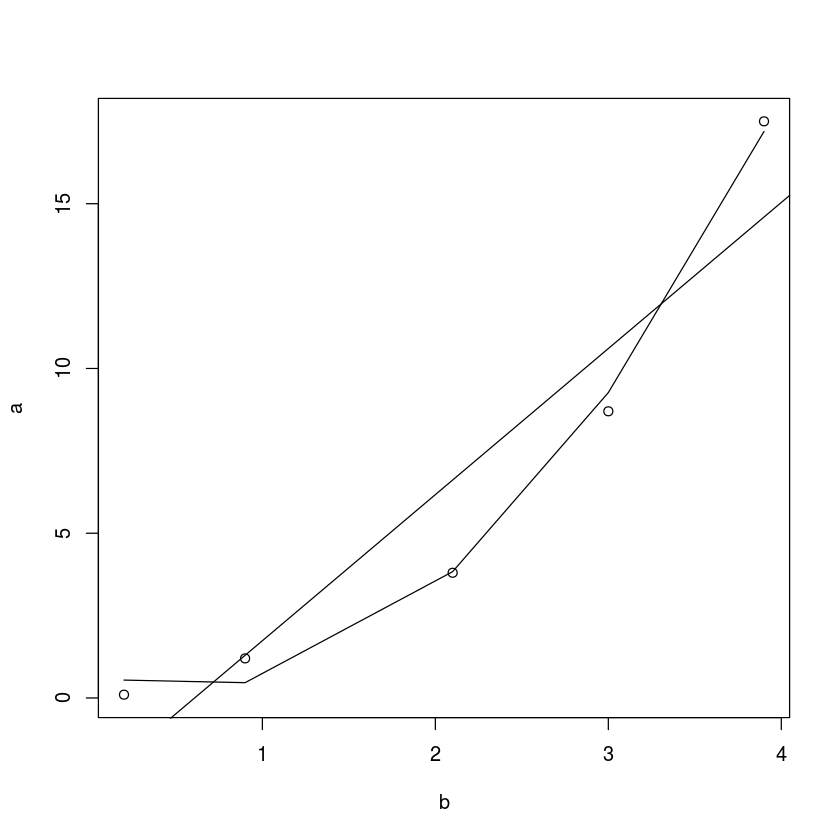

In [13]:
plot(b, a) # Cada llamado a plot crea un grafico nuevo
abline(c) # Grafica la recta de un modelo lineal
e = d$coefficients[[1]] + d$coefficients[[2]]*b + d$coefficients[[3]]*b**2
lines(b, e) # Contruye lineas entre los pares de puntos

R tiene soporte a la mano para la lectura de archivos con información numérica. Para archivos separados por espacios podemos usar `read.table` y si es un archivo separado por comas usamos `read.csv`.

In [14]:
tabla = read.table("r_datos.txt")
print(tabla)
tabla
attributes(tabla)

   V1 V2 V3
1   0  0  1
2   1  1  3
3   2  4  3
4   3  8  6
5   4  1  2
6   5  2  5
7   6  3  6
8   7  4  7
9   8  7  1
10  9  8  2
11 10  1 10
12  2  0  5
13  6  0  7


V1,V2,V3
0,0,1
1,1,3
2,4,3
3,8,6
4,1,2
5,2,5
6,3,6
7,4,7
8,7,1
9,8,2


$names
[1] "V1" "V2" "V3"

$class
[1] "data.frame"

$row.names
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13

Otros tipos de gráficos se encuentras disponibles sin necesidad de paquetes especiales, tambien de interes estadistico, como lo son histogramas (`hist`) y los gráficos de cajas y bigotes (`boxplot`).

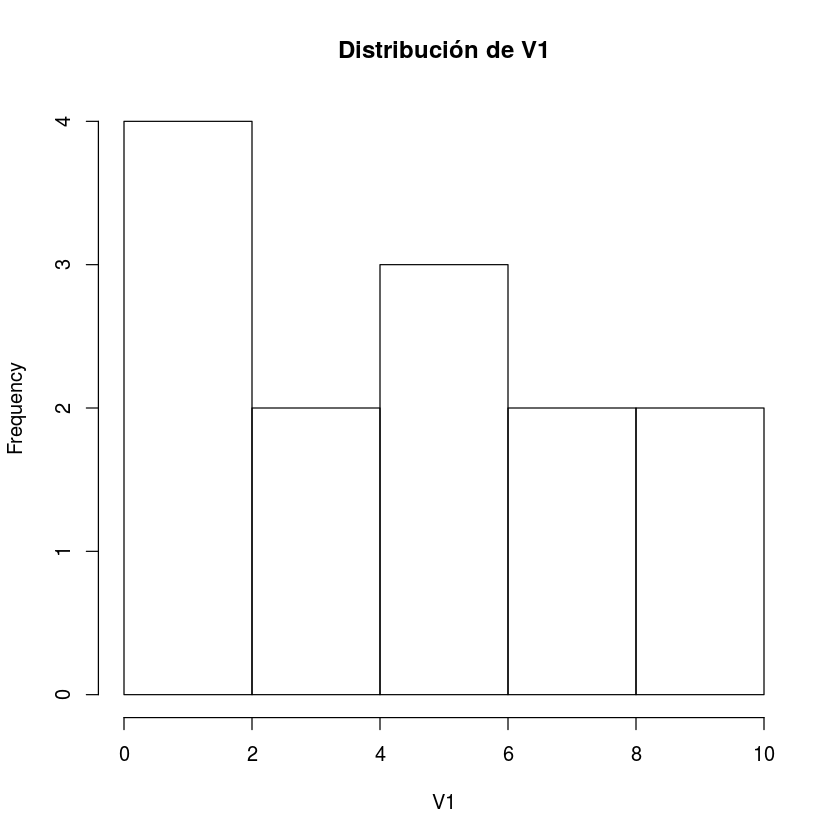

In [15]:
hist(tabla$V1, main="Distribución de V1", xlab="V1")

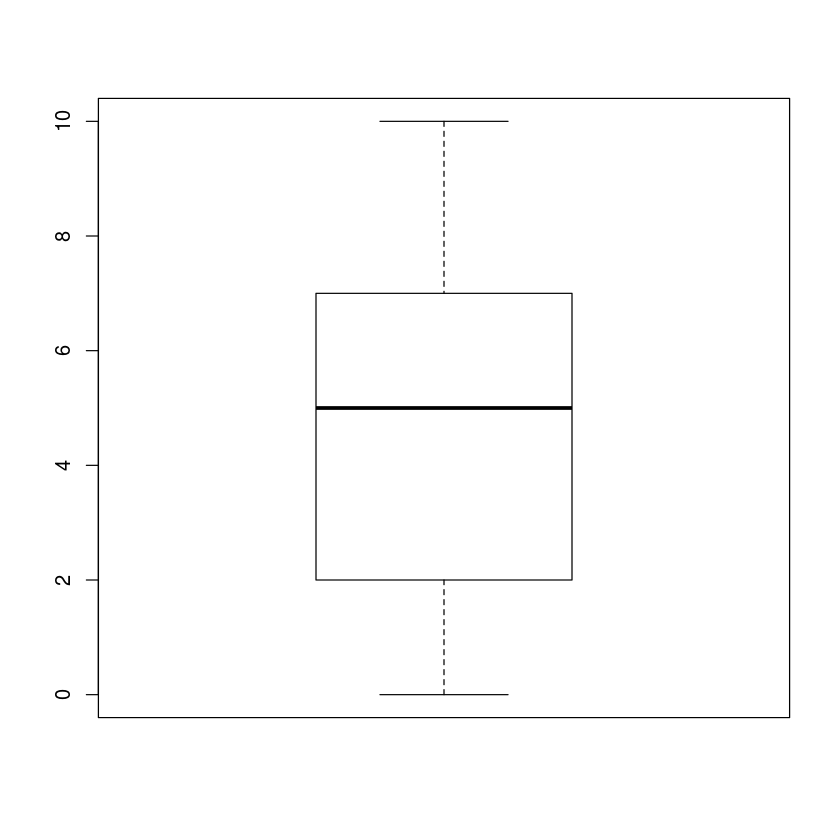

In [16]:
boxplot(tabla$V1)

### Estadistica con R

Múltiples funciones estadisticas se encuentran tambien disponibles con funciones precargadas (_built-in_) en R. Como ejemplo de calculos básicos tenemos:

In [17]:
mean(tabla$V1) # Media
sd(tabla$V1) # Desviación estandar
min(tabla$V1) # Mínimo
max(tabla$V1) # Máximo

[1] 4.846154

[1] 3.158221

[1] 0

[1] 10

No solo encontramos funciones de estadistica descriptiva, sino tambien funciones asociadas a la estadistica inferencial, como las funciones de distribución. Podemos encontrar disponibles como ejemplo, algunas distribuciones de uso bastante común como la distribución normal, chi cuadrado  y binomial. Para más información sobre el uso de R con estas distribuciones consultar con `help` con los argumentos `Normal`, `Chisquare` y `Binomial`.

In [18]:
help(Normal)

Normal {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
mean,vector of means.
sd,vector of standard deviations.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x] otherwise, P[X > x]."


### Programación  

El lenguaje R permite la realización de algoritmos. Para mayor detalle sobre esto puede consultar la ayuda de R o la bibliografía.  

In [19]:
help("Control")

Control {base},R Documentation
cond,"A length-one logical vector that is not NA. Conditions of length greater than one are accepted with a warning, but only the first element is used. Other types are coerced to logical if possible, ignoring any class."
var,A syntactical name for a variable.
seq,An expression evaluating to a vector (including a list and an expression) or to a pairlist or NULL. A factor value will be coerced to a character vector.
"expr, cons.expr, alt.expr","An expression in a formal sense. This is either a simple expression or a so called compound expression, usually of the form { expr1 ; expr2 }."


In [20]:
help(source)

source {base},R Documentation
file,"a connection or a character string giving the pathname of the file or URL to read from. """" indicates the connection stdin()."
local,"TRUE, FALSE or an environment, determining where the parsed expressions are evaluated. FALSE (the default) corresponds to the user's workspace (the global environment) and TRUE to the environment from which source is called."
echo,"logical; if TRUE, each expression is printed after parsing, before evaluation."
print.eval,"logical; if TRUE, the result of eval(i) is printed for each expression i; defaults to the value of echo."
verbose,"if TRUE, more diagnostics (than just echo = TRUE) are printed during parsing and evaluation of input, including extra info for each expression."
prompt.echo,character; gives the prompt to be used if echo = TRUE.
max.deparse.length,integer; is used only if echo is TRUE and gives the maximal number of characters output for the deparse of a single expression.
chdir,"logical; if TRUE and file is a pathname, the R working directory is temporarily changed to the directory containing file for evaluating."
encoding,"character vector. The encoding(s) to be assumed when file is a character string: see file. A possible value is ""unknown"" when the encoding is guessed: see the ‘Encodings’ section."
continue.echo,character; gives the prompt to use on continuation lines if echo = TRUE.


In [21]:
help("function")

function {base},R Documentation
arglist,Empty or one or more name or name=expression terms.
expr,An expression.
value,An expression.


## Bibliografía  

1. [The R Project for Statistical Computing](https://www.r-project.org). Consultado el 10 de octubre de 2016.  
1. [IRkernel](https://irkernel.github.io). Consultado el 10 de octubre de 2016.  
1. [IRkernel github](https://github.com/IRkernel/IRkernel). consultado el 10 de octubre de 2016.  
1. [Jupyter and Conda for R](https://www.continuum.io/blog/developer/jupyter-and-conda-r). Consultado el 13 de octubre de 2016.  
1. [How to run R on Jupyter ipython Notebooks?](https://discuss.analyticsvidhya.com/t/how-to-run-r-on-jupyter-ipython-notebooks/5512). Consultado el 13 de octubre de 2016.  
1. [R Tutor: Introduction](http://www.r-tutor.com/r-introduction). Consultado el 11 de octubre de 2016.  
1. [R Tutorial](http://www.cyclismo.org/tutorial/R/), Cyclismo. Consultado el 11 de octubre de 2016.  
1. [R Tutor: Probability distributions](http://www.r-tutor.com/elementary-statistics/probability-distributions). Consultado el 13 de octubre.  
1. R in Action.  
1. [Rseek](http://rseek.org). Buscados especializado de R.  